# Minggu 1

Eksplorasi awal pengenalan dataset

Import library yang dibutuhkan<br>
salah satu library **penting** yang selalu kepakai adalah **pandas**

In [1]:
import pandas as pd
#masukkan dataset ke dalam jupyter

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

Mengecek 5 data ter-atas. Bisa sesuka hati juga sih mau ngecek 7 data 10 atau berapa aja tinggal yang didalam kurung dikasih angka. Defaultnya 5

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#untuk mengecek data terbawah
train.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Mengecek sebaran statistik data

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


dapat dilihat bahwa rata2 survived = 38% dari total penumpang<br>
nilai mean dan median penting untuk menjadi pertimbangan pengisian nilai NaN karena dapat mewakilkan distribusi data. Analisis lebih lanjut bisa dilakukan sendiri juga (suka-suka kita asal beralasan logis)

In [5]:
#Cek nilai yang NaN (kosong)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dapat dilihat bahwa total keseluruhan data adalah 891 <br>
pada kolom Age, Cabin dan Embarked memiliki nilai < 891 yg artinya terdapat nilai kosong di data tersebut.

Terdapat banyak opsi untuk mengatasi NaN ini. Pertemuan berikutnya akan dibahas

# Cari fitur yang setidaknya tidak perlu (tidak memberikan informasi yang berarti terhadap keseluruhan data)

Contohnya : PassengerId<br>
'Cabin' juga dapat di drop karena missing valuenya (NaN) lebih dari 50% data sendiri. Selain itu logikanya cabin bisa diwakilkan sama kelas gak sih kan mengelompok pasti per kelasnya.

In [6]:
train = train.drop(['PassengerId','Cabin'], axis =1)

In [7]:
#cek apakah kolom passengerId sama cabin udah ilang atau belum
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Cek jumlah perbandingan wanita dan laki-laki

In [8]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Cek perbandingan survived dan tidak survived

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Logikanya kan kalau cowok itu lebih strong jadi kemungkinan besar cowok yang banyak survived apalagi jumlah cowoknya sedikit. Kita boleh berasumsi, tapi mari kita cek

In [10]:
train.loc[train['Survived']==1].head(10) #loc digunakan untuk mengecek data yang lokasinya sesuai sama perintah diberi

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C


In [11]:
train.loc[train['Survived']==0].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
12,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,S


dari sample data headnya kebetulan malah menunjukkan yg lebih banyak survived adalah cewek. Tapi kan baru sample data dan cuma 5. Mari kita cek keseluruhannya

In [12]:
train.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Huwoo ternyata benar malah ceweknya yang paling banyak survived (74%). Ladies first mungkin ya jadi karena yang laki-laki pada strong mereka rela untuk menyelamatkan para wanita terlebih dahulu. <br>
Ini baru berdarkan gender nih. Kan yang naik beragam umurnya. Dari gender keliatan kalau ternyata yang banyak survived yang cewek.<br>
Apakah umur mempengaruhi? Misal anak-anak kan harusnya juga jadi prioritas yang diselamatkan (pada prosedur penyelamatan). Mari kita cek di pertemuan berikutnya

# Mengubah Kategorikal data menjadi numerikal

Data kategorikal pada titanic ini : <br>
- Sex
- Ticket
- Name
- Embarked

In [13]:
'''ubah keterangan 'sex' ke dalam numerik.
    Female = 1
    Male = 0
'''
def gen(Gen):
    if Gen == 'male':
        return 0
    elif Gen == 'female':
        return 1

In [14]:
train['Sex'] = train['Sex'].apply(gen)

In [15]:
#cek dah keubah belum
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S


# Minggu 2

In [16]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C


- one hot encoding -> 0 0 1, 0 1 0, 1 0 0
- label encoding -> 0 1 2 3 dst

In [17]:
train = pd.get_dummies(train, columns = ['Embarked'])

In [18]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1,0,0


In [19]:
kata = "kuda.aku"
kata

'kuda.aku'

In [20]:
kata.split('.')

['kuda', 'aku']

In [21]:
kotak = []
for i in range(10):
    kotak.append(i)
    
kotak

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
kotak = [i for i in range(10)]
kotak

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
train['Title'] = [i.split('.')[0] for i in train.Name.astype('str')]
train['Title'] = [i.split(',')[1] for i in train.Title.astype('str')]

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,Mr


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
 12  Title       891 non-null    object 
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [26]:
train.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [27]:
train['title'] = [i.split('.')[0] for i in train.Name.astype('str')]
train['title'] = [i.split(',')[1] for i in train.title.astype('str')]

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,Mr,Mr


In [29]:
train = train.drop(['Title'], axis =1 )

In [30]:
train = train.drop(['Ticket'], axis =1 )

In [31]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1,Miss


In [32]:
train = train.drop(['Name'], axis =1)

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,0,22.0,1,0,7.2500,0,0,1,Mr
1,1,1,1,38.0,1,0,71.2833,1,0,0,Mrs
2,1,3,1,26.0,0,0,7.9250,0,0,1,Miss
3,1,1,1,35.0,1,0,53.1000,0,0,1,Mrs
4,0,3,0,35.0,0,0,8.0500,0,0,1,Mr


In [34]:
train[['title','Sex','Survived']].groupby(['title'],as_index=False)

In [35]:
train[['title','Sex','Survived']].groupby(['title'], 
            as_index=False).mean().sort_values(by='Survived', 
                                               ascending = False)

,title,Sex,Survived
16,the Countess,1.000000,1.000000
9,Mlle,1.000000,1.000000
15,Sir,0.000000,1.000000
13,Ms,1.000000,1.000000
5,Lady,1.000000,1.000000
10,Mme,1.000000,1.000000
12,Mrs,1.000000,0.792000
8,Miss,1.000000,0.697802
7,Master,0.000000,0.575000
1,Col,0.000000,0.500000


In [36]:
def Title(t):
    if t == ' the Countess' or t == ' Mlle' or t == ' Sir' or t == ' Ms' or t ==' Lady' or t ==' Mme':
        return 0
    elif t == ' Mrs':
        return 1
    elif t == ' Miss':
        return 2
    elif t == ' Master':
        return 3
    elif t == ' Col':
        return 4
    elif t == ' Major':
        return 5
    elif t == ' Dr':
        return 6
    elif t == ' Mr':
        return 7
    else:
        return 8

train['title'] = train['title'].apply(Title)

In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,0,22.0,1,0,7.2500,0,0,1,7
1,1,1,1,38.0,1,0,71.2833,1,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,0,1,2
3,1,1,1,35.0,1,0,53.1000,0,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,7


In [38]:
pd.crosstab(train['title'], train['Survived'])

Survived,0,1
title,,
0,0,7
1,26,99
2,55,127
3,17,23
4,1,1
5,1,1
6,4,3
7,436,81
8,9,0


In [39]:
pd.crosstab(train['title'], train['Sex'])

Sex,0,1
title,,
0,1,6
1,0,125
2,0,182
3,40,0
4,2,0
5,2,0
6,6,1
7,517,0
8,9,0


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  title       891 non-null    int64  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [41]:
def isiUmur(u):
    if u == 0:
        return train.loc[train['title']==0].Age.mean()
    elif u == 1:
        return train.loc[train['title']==1].Age.mean()
    elif u == 2:
        return train.loc[train['title']==2].Age.mean()
    elif u == 3:
        return train.loc[train['title']==3].Age.mean()
    elif u == 4:
        return train.loc[train['title']==4].Age.mean()
    elif u == 5:
        return train.loc[train['title']==5].Age.mean()
    elif u == 6:
        return train.loc[train['title']==6].Age.mean()
    elif u == 7:
        return train.loc[train['title']==7].Age.mean()
    elif u == 8:
        return train.loc[train['title']==8].Age.mean()
    
train['Age']= train.Age.fillna(train.title.apply(isiUmur))

In [42]:
round(train.loc[train['title']==0].Age.mean())

33

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  title       891 non-null    int64  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [44]:
#X_train = train[:600]

X = train.drop(['Survived'], axis =1)
y = train['Survived']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 10) (179, 10) (712,) (179,)


In [47]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

#membuat model
model = LogisticRegression()

#training model
model.fit(X_train, y_train)

/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [48]:
y_prediksi = model.predict(X_test)
akurasi_train = round(model.score(X_train, y_train) *100,2)
akurasi_validasi = round(model.score(X_test, y_test) *100,2)

print(akurasi_train)
print(akurasi_validasi)

84.13
78.77


In [49]:
y_prediksi

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0])

# Pertemuan ke-3

In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,0,22.0,1,0,7.2500,0,0,1,7
1,1,1,1,38.0,1,0,71.2833,1,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,0,1,2
3,1,1,1,35.0,1,0,53.1000,0,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,7


In [52]:
test = test.drop(['PassengerId','Cabin','Ticket'], axis = 1)

In [53]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [54]:
test = pd.get_dummies(test, columns = ['Embarked'])

In [55]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,0,0,1


In [56]:
test['Sex'] = test['Sex'].apply(gen)

In [57]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,0,1,0
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0,0,1


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    int64  
 3   Age         332 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        417 non-null    float64
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 24.2+ KB


In [59]:
test['title'] = [i.split('.')[0] for i in test.Name.astype('str')]
test['title'] = [i.split(',')[1] for i in test.title.astype('str')]

In [60]:
test['title'] = test['title'].apply(Title)

In [61]:
test = test.drop(['Name'], axis = 1)

In [62]:
test['Fare'] = test.Fare.fillna(test.Fare.median())

In [63]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,3,0,34.5,0,0,7.8292,0,1,0,7
1,3,1,47.0,1,0,7.0000,0,0,1,1
2,2,0,62.0,0,0,9.6875,0,1,0,7
3,3,0,27.0,0,0,8.6625,0,0,1,7
4,3,1,22.0,1,1,12.2875,0,0,1,1


In [64]:
def isiUmur(u):
    if u == 0:
        return test.loc[test['title']==0].Age.mean()
    elif u == 1:
        return test.loc[test['title']==1].Age.mean()
    elif u == 2:
        return test.loc[test['title']==2].Age.mean()
    elif u == 3:
        return test.loc[test['title']==3].Age.mean()
    elif u == 4:
        return test.loc[test['title']==4].Age.mean()
    elif u == 5:
        return test.loc[test['title']==5].Age.mean()
    elif u == 6:
        return test.loc[test['title']==6].Age.mean()
    elif u == 7:
        return test.loc[test['title']==7].Age.mean()
    elif u == 8:
        return test.loc[test['title']==8].Age.mean()
    
test['Age']= test.Age.fillna(test.title.apply(isiUmur))

In [65]:
test['Age'] = test.Age.fillna(test.Age.median())

In [66]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,3,0,34.5,0,0,7.8292,0,1,0,7
1,3,1,47.0,1,0,7.0000,0,0,1,1
2,2,0,62.0,0,0,9.6875,0,1,0,7
3,3,0,27.0,0,0,8.6625,0,0,1,7
4,3,1,22.0,1,1,12.2875,0,0,1,1


In [67]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [68]:
logreg = LogisticRegression()

X = train.drop(['Survived'], axis = 1)
y = train['Survived']

accuracy = cross_val_score(logreg, X, y, scoring='accuracy', cv =10)

logreg.fit(X,y)
print(accuracy)
# get the mean of each fold
print("Rata-rata akurasi: ", accuracy.mean() * 100)

/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[0.82222222 0.85393258 0.7752809  0.86516854 0.82022472 0.76404494
 0.83146067 0.82022472 0.85393258 0.84269663]
Rata-rata akurasi:  82.49188514357053


/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [90]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [69]:
logreg.fit(X,y)

/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [70]:
y_submit = logreg.predict(test)

In [92]:
y_submit

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [93]:
submission['Survived'] = y_submit

In [94]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
submission.to_csv('titanic_submit.csv', index = False)

In [75]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# VISUALISASI

In [76]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


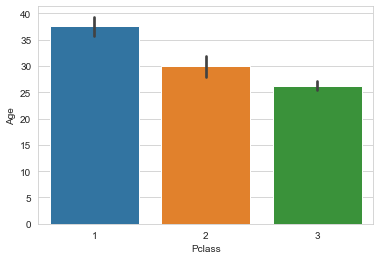

In [77]:
sns.set_style('whitegrid')

classAge = sns.barplot(x = 'Pclass', y = 'Age', data = train)

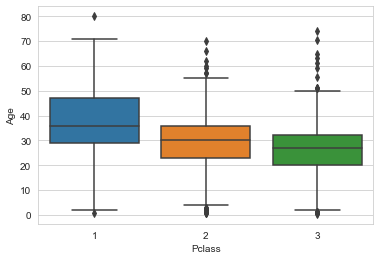

In [78]:
classAge = sns.boxplot(x = 'Pclass', y = 'Age', data = train)

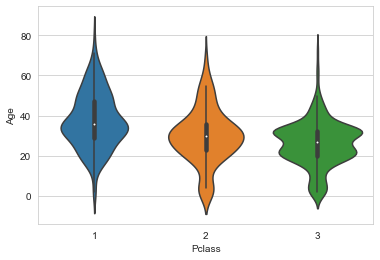

In [79]:
classAge = sns.violinplot(x = 'Pclass', y = 'Age', data = train)

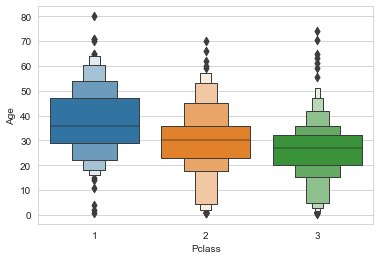

In [80]:
classAge = sns.boxenplot(x = 'Pclass', y = 'Age', data = train)

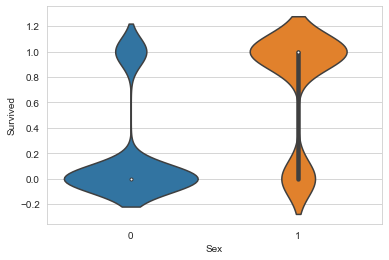

In [81]:
classSurvived = sns.violinplot(x = 'Sex', y = 'Survived', data = train)

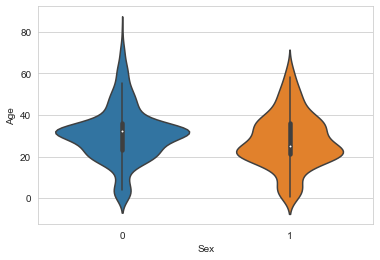

In [82]:
classAge = sns.violinplot(x = 'Sex', y = 'Age', data = train)

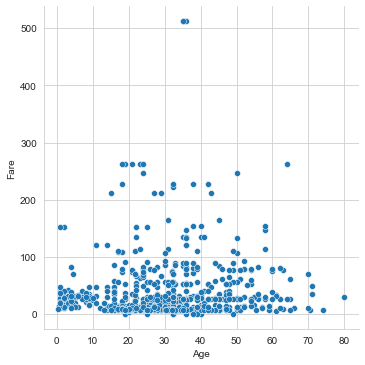

In [83]:
sns.relplot(x = 'Age', y = 'Fare', data = train)

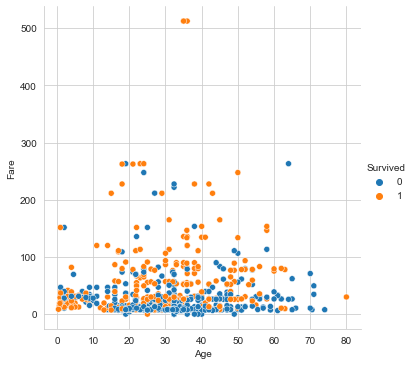

In [84]:
sns.relplot(x = 'Age', y = 'Fare', hue = 'Survived', data = train)

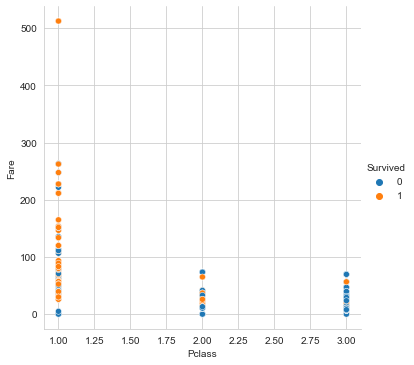

In [85]:
sns.relplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train)

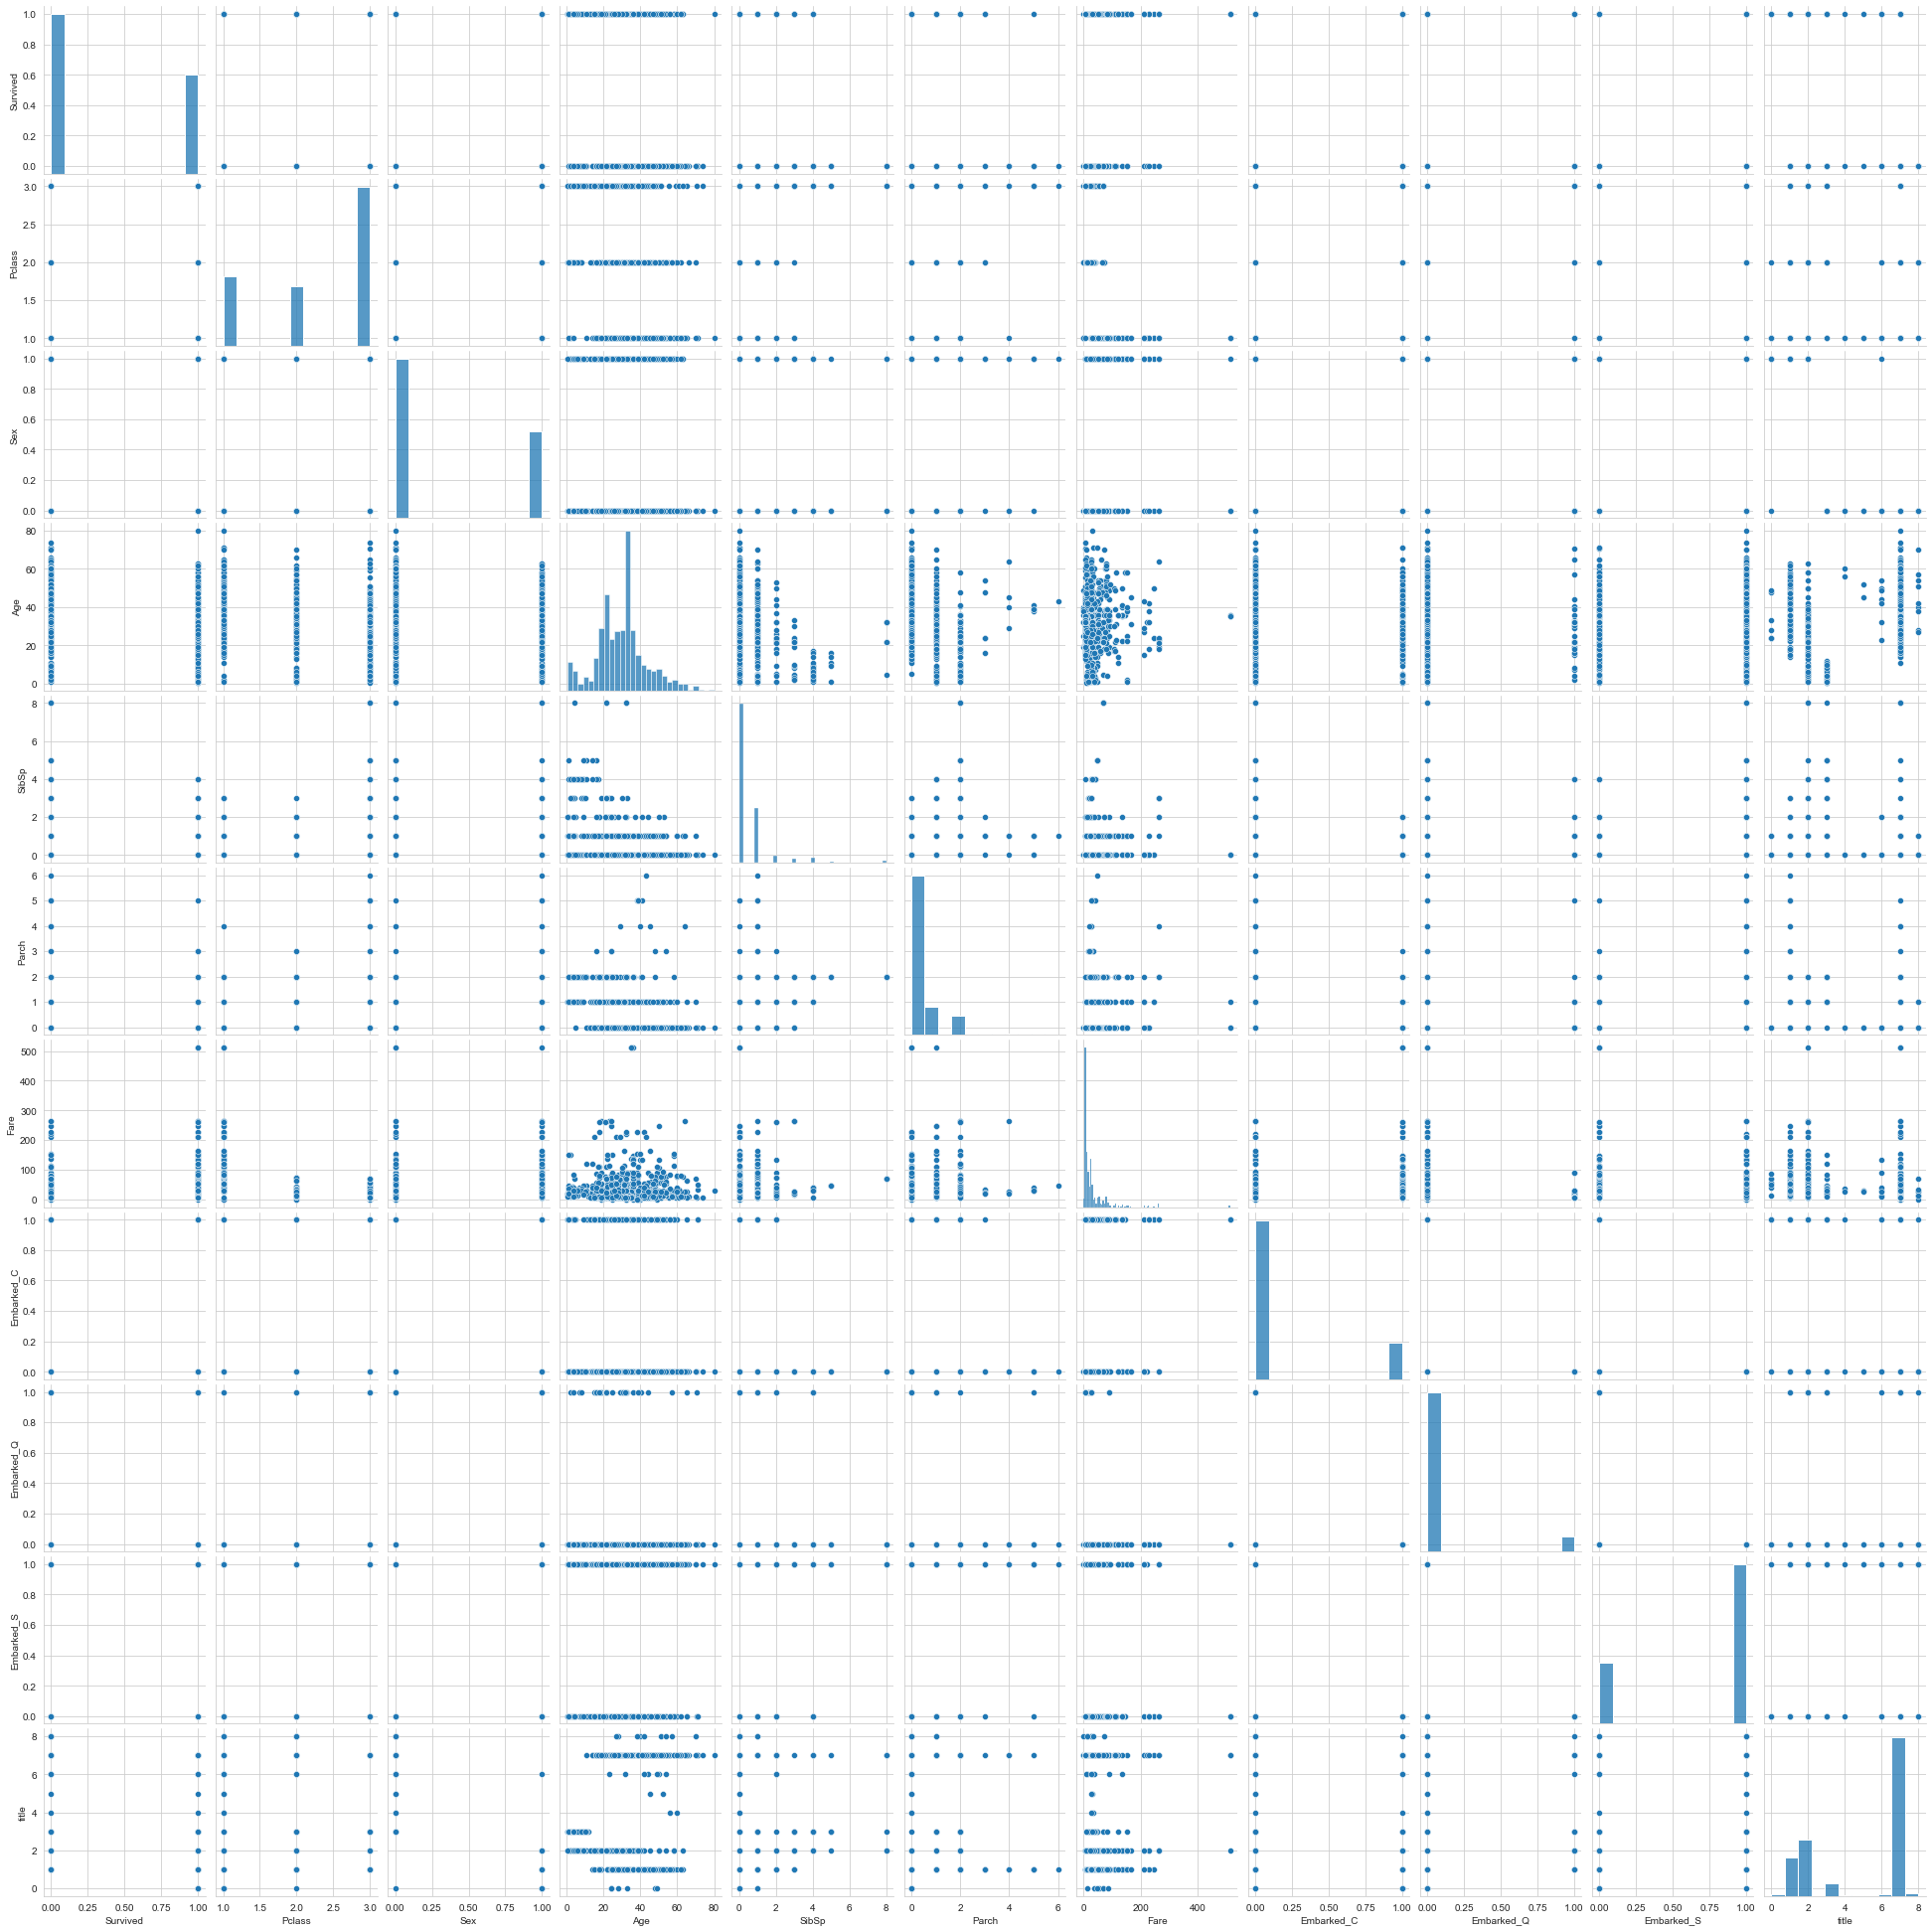

In [86]:
sns.pairplot(train)

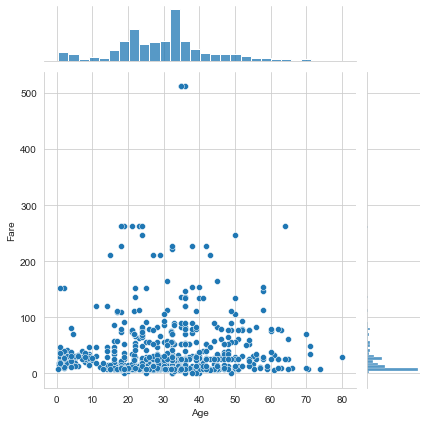

In [87]:
sns.jointplot(x = 'Age', y = 'Fare', data = train)

<AxesSubplot:>

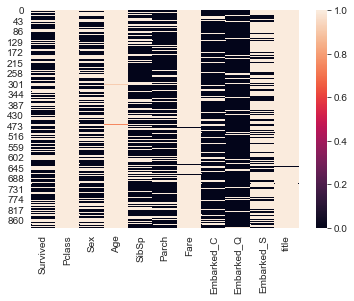

In [88]:
sns.heatmap(train, vmin = 0, vmax = 1)

<AxesSubplot:>

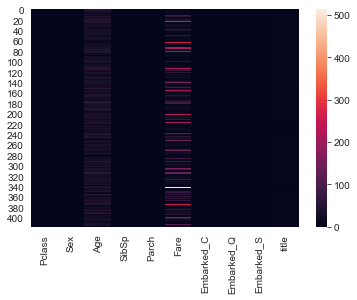

In [89]:
sns.heatmap(test)